In [128]:
import Bio
#install biopython

In [129]:
#-- Functions --#

In [130]:
#Installing proper packages
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

In [131]:
#1: Document Dr. X's function with comments/markdown

def get_sequences_from_file(fasta_fn): #defines function "get_sequences"
    sequence_data_dict = {} #creates a dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): #for loop using seq10 module for each file
        description = record.description.split() #splits record into list based on spaces
        species_name = description[1] + " " + description[2] #uses split items to create species names
        sequence_data_dict[species_name] = record.seq #sets key and value
    return(sequence_data_dict) #returns dictionary with species names/seq data

In [144]:
#2: Write function to translate nucs to amino acids (from suggestion)

#pseudocode provided
#def translate_function(string_nucleotides): 
    #mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    #for-loop through every third position in string_nucleotides
    #mito_table.forward_table[codon] #retrieve amino acid
    #add aa to aa_seq_string
    #return(aa_seq_string) #returns aa's

from Bio.Data import CodonTable #import codon table
def translate_function(string_nucleotides): #define translate_function
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #set mito table to be vertebrate codon table
    aa_seq_string = "" #creates an empty string
    if len(string_nucleotides)%3 == 0: #makes sure string is divisible by 3 (no incomplete codons)
        for i in range(0, len(string_nucleotides), 3): #for loop through third position
            codon = string_nucleotides[i:i + 3] #get's codon for each position
            if codon in mito_table.stop_codons: #breaks loop if stop codon is present
                break
            aa = mito_table.forward_table[codon] #defines amino acids based on codon table
            aa_seq_string += aa #append aa's
        return aa_seq_string #returns aa's

In [133]:
#3: Write alternative translation function
from Bio.Data import CodonTable #import codon table
from Bio.Seq import Seq #import Seq

def alt_translate_function(string_nucleotides): #defines alt_translate_function
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #set mito table to be vertebrate codon table
    dna_seq_string = Seq(string_nucleotides) #creates a seq object for the string
    aa_seq_string = dna_seq_string.translate(table=mito_table, to_stop=True) #translates using the mito table, and breaks loop for stop codons
    return str(aa_seq_string) #converts to string and returns it

In [134]:
#4: Write a function to calculate mol. weight of each 3AA sequence
#I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam

from Bio.Seq import Seq #import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis #import ProteinAnalysis

def compute_molecular_weight(aa_seq): #defines "compute_molecular_weight"
    aa_seq_str = str(aa_seq) #converts to a string
    aa_seq_str_no_stops = aa_seq_str.replace("*","") #removes stop codons
    aa_seq_no_ambig = Seq(''.join([aa for aa in aa_seq_str_no_stops if aa in "ACDEFGHIKLMNPQRSTVWY"])) #removes the ambiguous codon (addressed due to error later)
    prot_seq = ProteinAnalysis(str(aa_seq_no_ambig)) #convert seq to string before running ProteinAnalysis
    mol_wt_seq = prot_seq.molecular_weight() #used to calculate molecular weight of protein
    return mol_wt_seq 

In [135]:
#5: Write a function to compute GC-content of each DNA seq

def compute_gc_content(string_nucleotides): #defines "compute_gc_content"
    gc_count = string_nucleotides.count('G') + string_nucleotides.count('C') #counts amount of G and C in string
    seq_count = len(string_nucleotides) #counts length of string
    gc_content = gc_count / seq_count #divides gc by total length
    return gc_content

In [136]:
#-- Main Script --#

In [151]:
#6: add (1) mol. weight and (2) GC content to Penguin DF
#7: recall functions to fill in these columns

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") #utilizes previous function to pull penguin sequences

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species) #defines species list

gc_content_list = [float('NaN')] * len(species_list) #creates empty list for GC content with "NaN" in empty cells the length of species_list
mol_wt_list = [float('NaN')] * len(species_list) #creates empty list for molecular weight ""
aa_seq_list = [float('NaN')] * len(species_list) #creates empty list for aa sequences ""

for i, (name, sequence) in enumerate(cytb_seqs.items()): #for loop
    nucleotide_seq = str(sequence) #defines nucleotide_seq as a string of sequence
    aa_seq = alt_translate_function(nucleotide_seq) #runs translate function
    aa_seq_list [i] = (aa_seq) #replaces values in list
    gc_content_list [i] = (compute_gc_content(nucleotide_seq)) #runs gc_content function and replaces it in list
    mol_wt_list [i] = (compute_molecular_weight(nucleotide_seq)) #runs molecular weight function and replaces it in list

penguins_df_modified = penguins_df.assign(gc_content=gc_content_list, mol_wt=mol_wt_list, aa_seq=aa_seq_list) #adds lists to dataframe

penguins_df_modified #prints dataframe to double check


,species,mass,gc_content,mol_wt,aa_seq
0,Aptenodytes forsteri,28.00,0.483815,100706.2480,MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQI...
1,Aptenodytes patagonicus,13.40,0.496938,100610.4134,MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQI...
2,Eudyptes chrysocome,2.80,0.511811,100947.4416,MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQI...
3,Eudyptes chrysolophus,4.50,0.509186,100909.1934,MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQI...
4,Eudyptes sclateri,4.25,0.508311,101003.5480,MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQI...
5,Eudyptula minor,1.60,0.492563,101031.1084,MAPNLRKSHPLLKMINNSLIDLPTPSNISTWWNFGSLLGICLITQI...
6,Pygoscelis adeliae,4.60,0.490814,100746.2704,MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQI...
7,Pygoscelis antarctica,4.10,0.477690,100311.3870,MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQI...
8,Pygoscelis papua,6.10,0.471566,100771.9904,MAPNLRKSHPLLKMINKSLIDLPTPPNISAWWNFGSLLGICLITQI...
9,Spheniscus demersus,3.20,0.482940,100874.6150,MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQI...


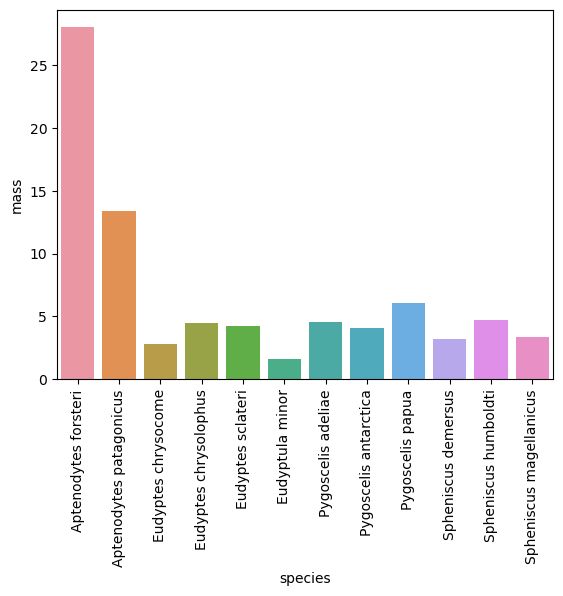

In [138]:
#8: Plot bar chart of adult body mass/species
##What is the smallest penguin species
####Eudyptula minor
##What is the geographical range of this species
####New Zealand! (They're very cute)

import matplotlib.pyplot as plt #imports matplotlib.pylot
import seaborn as sns #imports seaborn

sns.barplot(data=penguins_df_modified, x="species", y="mass", dodge=0.5) #creates bar plot of species and mass, separates columns
plt.xticks(rotation=90) #rotates x-axis labels (so species names aren't clustered)
plt.show() #shows graph

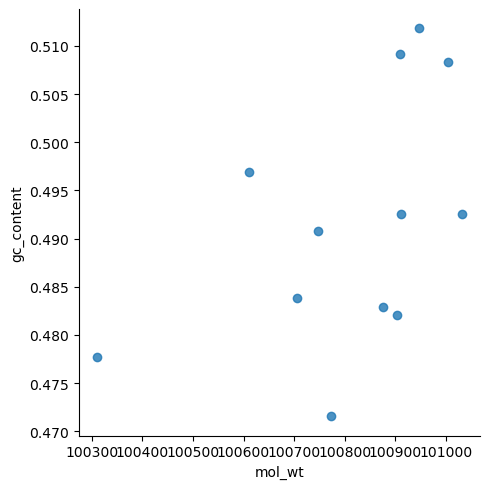

In [139]:
#9: Plot a graph showing molecular weight as a function GC content

sns.lmplot(data=penguins_df_modified, x="mol_wt", y="gc_content", fit_reg=False) #creates lmplot of molecular weight and gc_content, turns off linear regression line 
plt.show() #shows graph

In [140]:
#10: Write the entire DF into a new CSV file including new columns from 6

penguins_df_modified.to_csv('penguins_modified.csv', index=False)

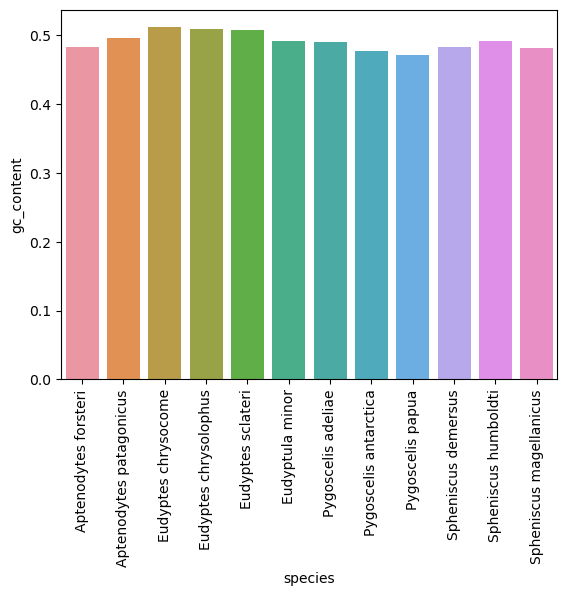

In [143]:
#11: BONUS what other visualizations/functions/tasks would you do?

sns.barplot(data=penguins_df_modified, x="species", y="gc_content", dodge=0.5) #creates bar graph of species and gc_content
plt.xticks(rotation=90) #rotates x-axis labels
plt.show() #shows graph

In [ ]:
#References

##I used the Biopython cookbook, the class notes website, the websites provided along with the assignment, and ChatGPT to help troubleshoot code